In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['STHeiti']
mpl.rcParams['font.serif'] = ['STHeiti']
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['STHeiti', 'STHeiti']})
# Set Default Encoding
import sys
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout

# 数据
数据分为混合型基金信息数据和日涨跌幅数据。

In [2]:
info = pd.read_csv('mixed_funds.csv')
info.head(1)

,code,name,url,type,manager,company
0,1,华夏成长,http://fund.eastmoney.com/000001.html,混合型,董阳阳,华夏基金


In [3]:
rate = pd.read_csv('mixed_funds_rate.csv')
rate['date'] = pd.to_datetime(rate['date'])
rate.set_index('date',inplace=True)
rate.head(1)

,000001,000011,000017,000020,000021,000029,000031,000039,000056,000057,...,710001,710002,720001,730001,730002,740001,750001,750005,762001,770001
date,,,,,,,,,,,,,,,,,,,,,
2017-10-30,-0.57,0.31,-0.71,-0.52,-0.37,-0.61,-0.98,-1.28,-0.1,-0.13,...,-0.02,-0.08,-1.67,-1.29,-0.16,-0.96,-1.03,-0.02,-0.67,-0.33


# 数据分析
## 2017 年数据分析
选取2017年数据，从2017.01.03开始，并删除掉不足一年的基金数据。

In [4]:
rate2017 = rate.truncate(after='1/3/2017')
df = rate2017[rate2017.columns[rate2017.notnull().sum() == rate2017.count().max()]]
df.head(1)

,000001,000011,000017,000020,000021,000029,000031,000039,000056,000057,...,710001,710002,720001,730001,730002,740001,750001,750005,762001,770001
date,,,,,,,,,,,,,,,,,,,,,
2017-10-30,-0.57,0.31,-0.71,-0.52,-0.37,-0.61,-0.98,-1.28,-0.1,-0.13,...,-0.02,-0.08,-1.67,-1.29,-0.16,-0.96,-1.03,-0.02,-0.67,-0.33


查看每一天中多少基金是上涨的。

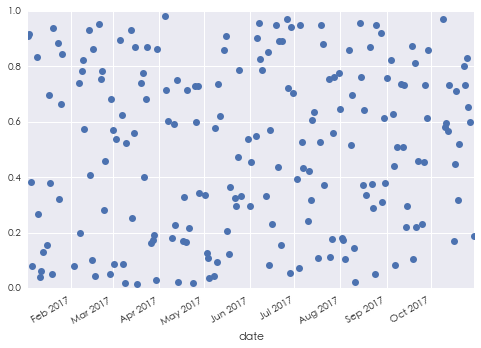

In [5]:
up_ratio = (df>0).sum(axis=1)/1862.
up_ratio.plot(ls='None',marker='o')

可以看出来，大部分的时候，上涨的基金所占的比例都超过一半。查看一下这么多天中，上涨超过一半的天数所占的比例有多少。

In [6]:
float((up_ratio>0.5).sum())/len(up_ratio)

0.535

也就是说，在这一年当中，上涨的基金数量超过一半的天数约为一半。  
接下来查看一下平均下来，一周中各天的情况。

In [7]:
up_ratio = up_ratio.to_frame(name='ratio')

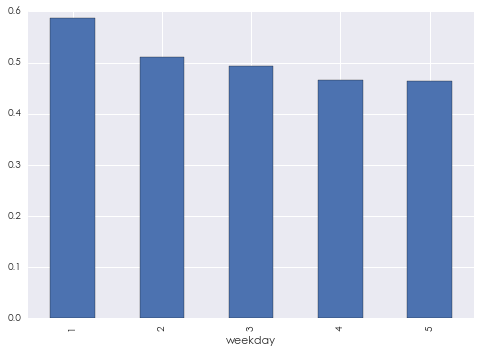

In [8]:
up_ratio['weekday'] = up_ratio.index.dayofweek + 1
up_ratio.groupby('weekday')['ratio'].mean().plot(kind='bar')

看起来跟星期几的关系不大，看一看跟月份的关系。

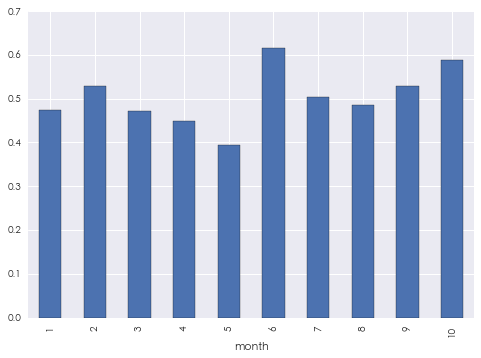

In [9]:
up_ratio['month'] = up_ratio.index.month 
up_ratio.groupby('month')['ratio'].mean().plot(kind='bar')

跟月份的关系也不大。  
接下来看下来每个基金的总的涨跌幅。

In [10]:
df.sort_index(axis=0,ascending=True,inplace=True)

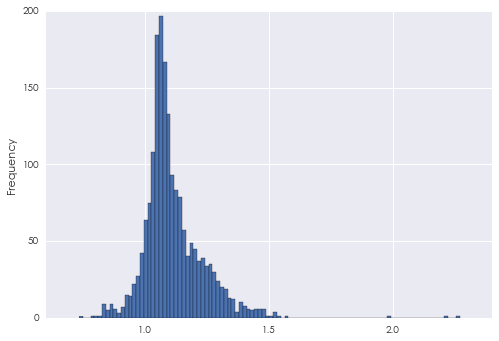

In [11]:
last_day = (df/100+1).cumprod().loc[datetime(2017,10,30),:]
last_day.plot(kind='hist',bins=100)

In [12]:
last_day.describe()

count    1862.000000
mean        1.112978
std         0.119684
min         0.735138
25%         1.047024
50%         1.084886
75%         1.162525
max         2.268803
Name: 2017-10-30 00:00:00, dtype: float64

在这一年里，所有基金平均上涨 11%，最牛的基金涨了 120%，另外有四分之一的基金涨幅在 16% 以上。  
查看一下涨幅排名前 20 的基金数据。

In [13]:
top20 = last_day.sort_values(ascending=False)[:20].index

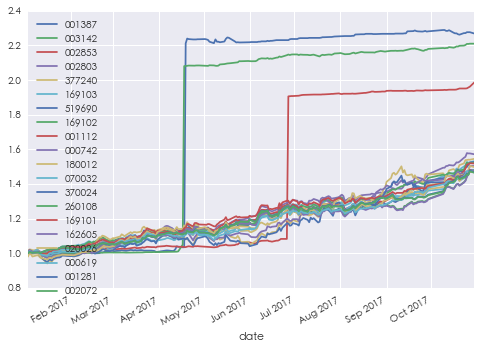

In [14]:
(df/100+1).cumprod()[top20].plot()

除了发生跳变的三支基金，表现比较好的基金涨幅约为 50%，且呈现平稳上升的趋势。
## 2017 年小结
2017年基金的整体表现良好，